In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [8]:
df_cor = df[['age', 'avg_salary', 'Rating']].corr()

In [9]:
df_cor

,age,avg_salary,Rating
age,1.000000,0.019655,0.021655
avg_salary,0.019655,1.000000,0.013492
Rating,0.021655,0.013492,1.000000


<Axes: >

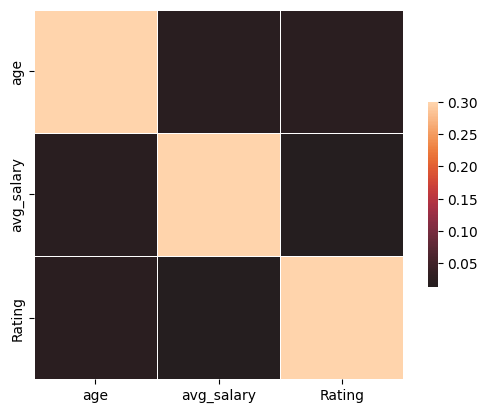

In [11]:
sns.heatmap(df_cor, vmax=.3, center = 0, square= True, linewidths= .5, cbar_kws = {"shrink": .5})

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'R_studio',
       'Spark', 'AWS', 'desc_len', 'num_of_comp', 'job_simp', 'seniority'],
      dtype='object')

In [13]:
df_cat = df[['Location','Headquarters','Type of ownership','Size','Industry','Sector','Revenue','company_text', 
             'job_state','Spark', 'AWS','job_simp', 'seniority']]

graph for Location: total = 200


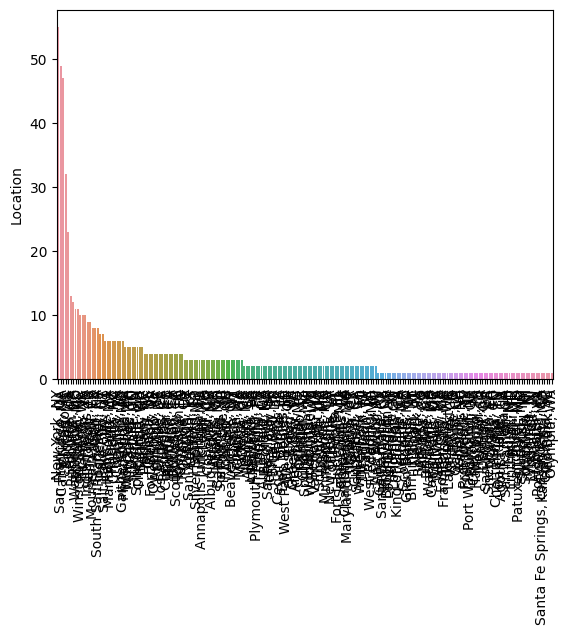

graph for Headquarters: total = 198


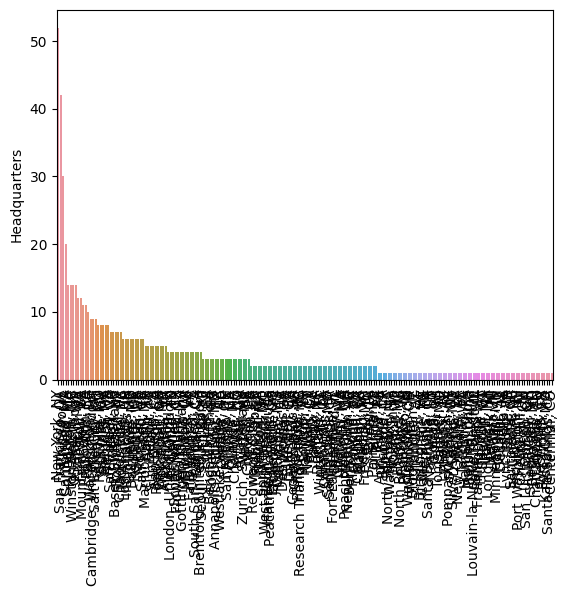

graph for Type of ownership: total = 11


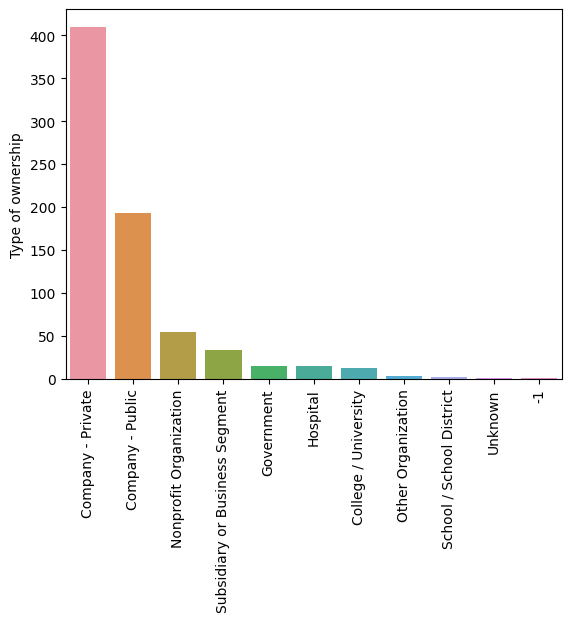

graph for Size: total = 9


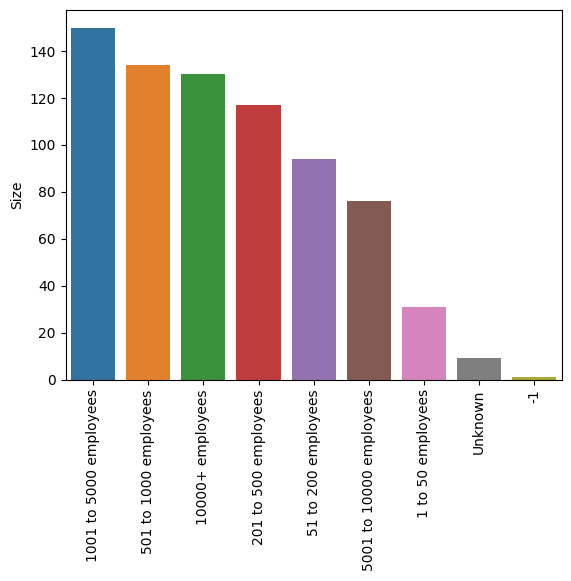

graph for Industry: total = 60


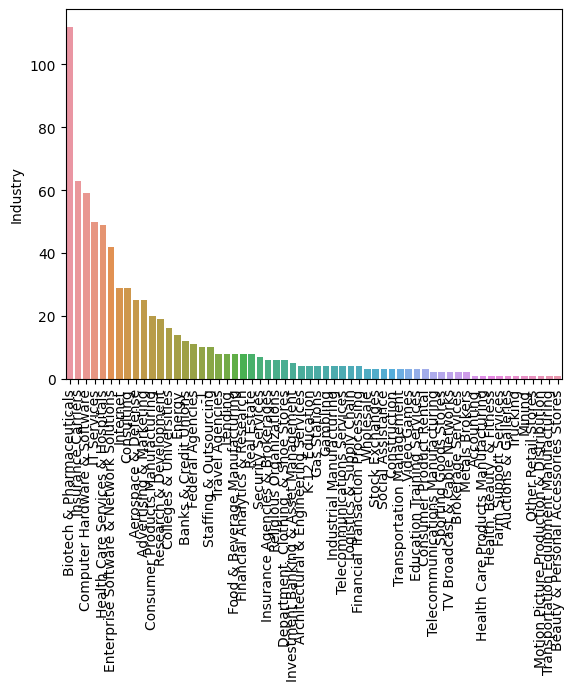

graph for Sector: total = 25


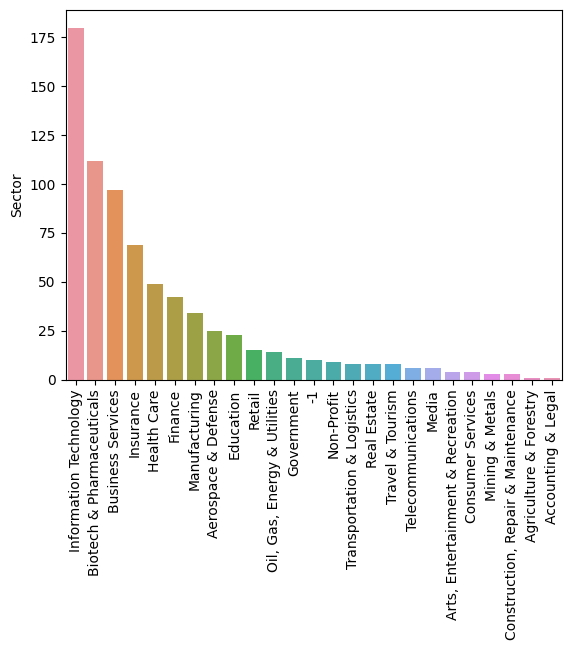

graph for Revenue: total = 14


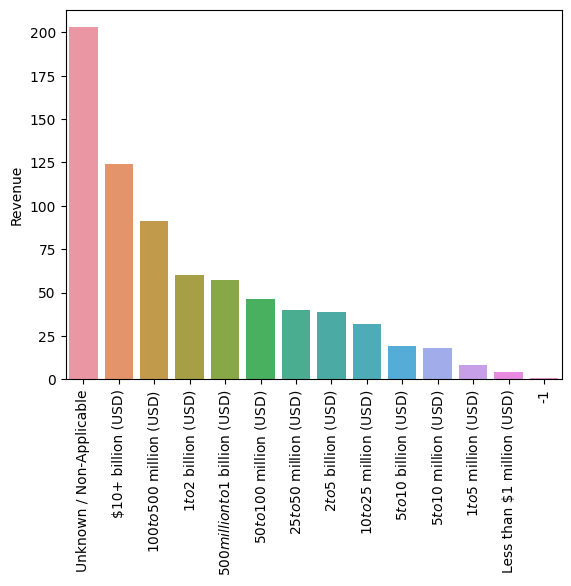

graph for company_text: total = 343


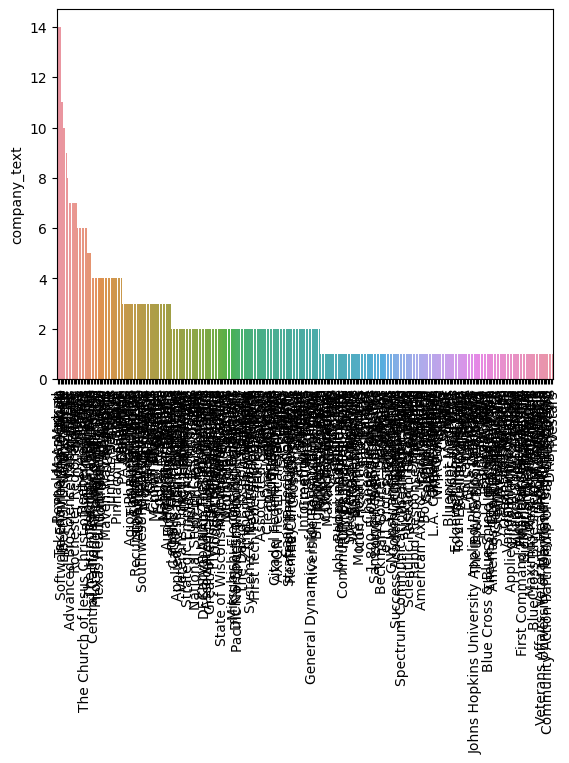

graph for job_state: total = 37


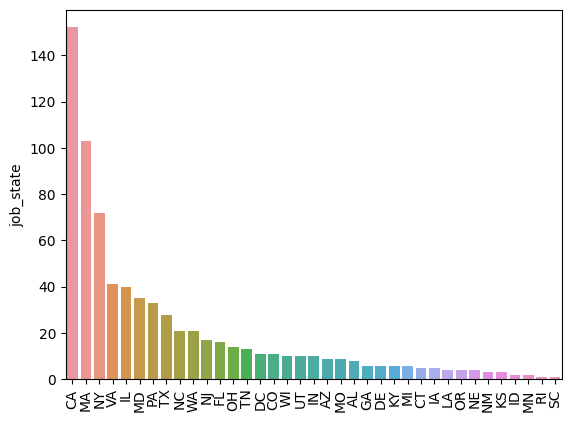

graph for Spark: total = 2


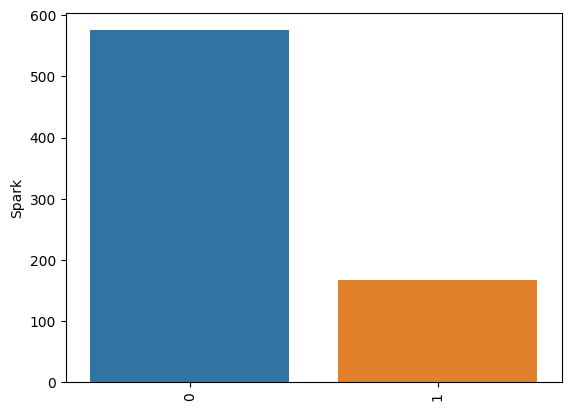

graph for AWS: total = 2


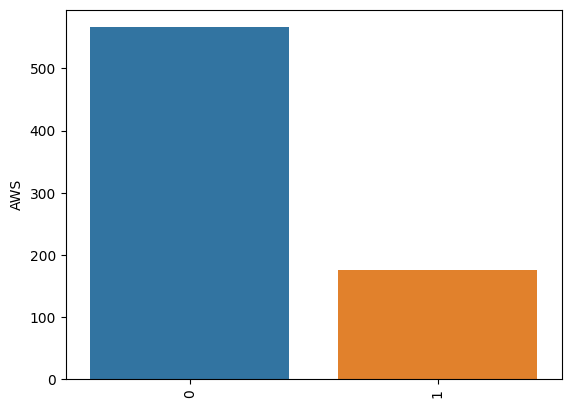

graph for job_simp: total = 7


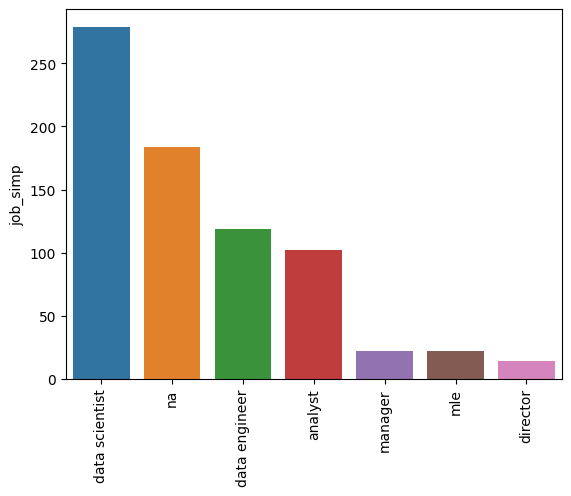

graph for seniority: total = 3


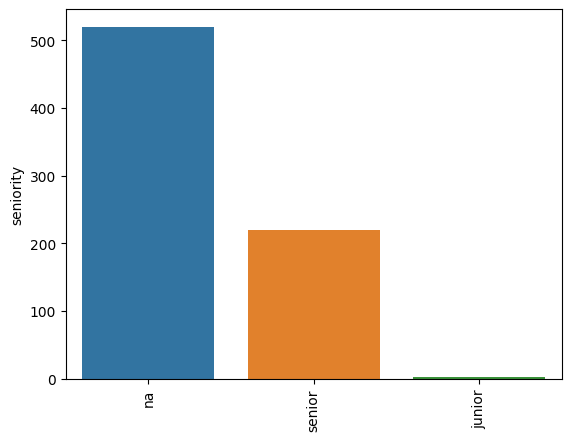

In [17]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index ,y= cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
  plt.show()

graph for Location: total = 20


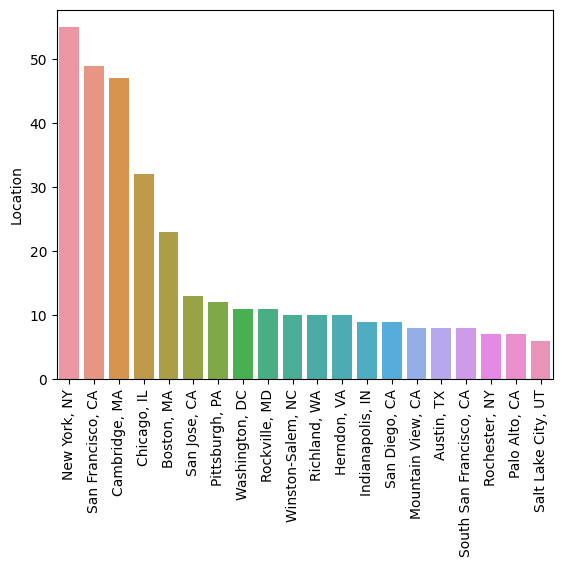

graph for Headquarters: total = 20


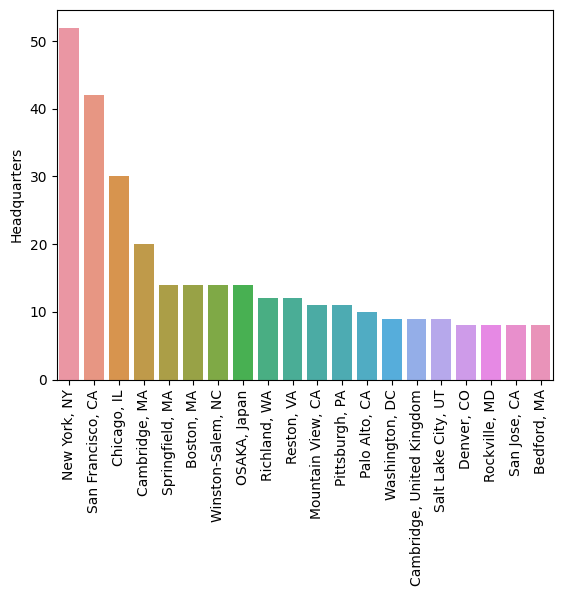

graph for company_text: total = 20


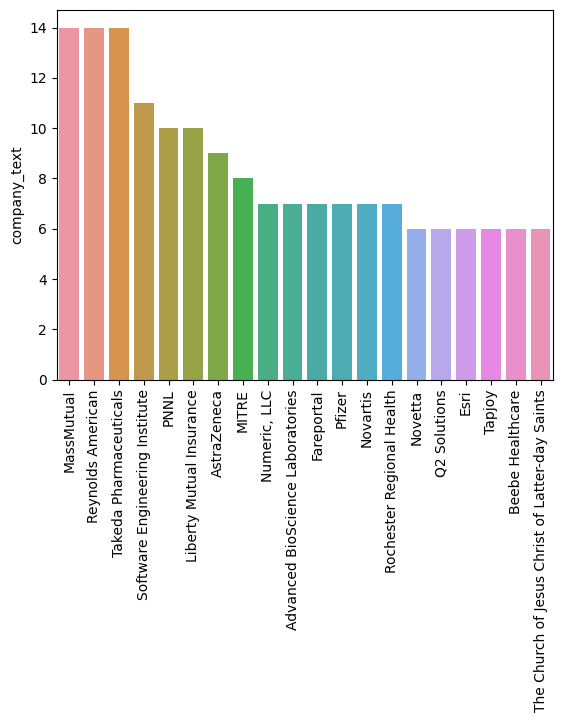

In [20]:
for i in df_cat[['Location', 'Headquarters', 'company_text']].columns:
  cat_num = df_cat[i].value_counts()[:20]
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index ,y= cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
  plt.show()

In [22]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        junior      56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [24]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state job_simp                  
IL        director        221.750000
CA        mle             177.300000
NJ        director        161.500000
DC        data scientist  149.000000
CA        data scientist  142.522059
...                              ...
CO        na               31.500000
          analyst          29.500000
DE        na               27.500000
LA        na               20.000000
TN        analyst          13.500000

[114 rows x 1 columns]

In [25]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc= 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
...                              ...
AZ        analyst                  1
          na                       2
AL        na                       2
          data engineer            1
          analyst                  5

[114 rows x 1 columns]

In [26]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


Rating, industry, sector, revenu, number of 
competitors, hourly, employer provided, python,
R-studio, spark, aws, desc_len, type of owneship

In [31]:
df_pivots = df[[ 'Rating','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'python', 'R_studio',
       'Spark', 'AWS', 'desc_len', 'num_of_comp','avg_salary']]

In [36]:
for i in df_pivots.columns:
  print(i)
  print(pd.pivot_table(df_pivots, index = i, values= 'avg_salary').sort_values('avg_salary', ascending =False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Type of ownership
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government                       84.300000
Scho

ValueError: ignored

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue', values= 'python', aggfunc = 'count')

,python
Revenue,
$1 to $2 billion (USD),60
$1 to $5 million (USD),8
$10 to $25 million (USD),32
$10+ billion (USD),124
$100 to $500 million (USD),91
$2 to $5 billion (USD),39
$25 to $50 million (USD),40
$5 to $10 billion (USD),19
$5 to $10 million (USD),18


In [38]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

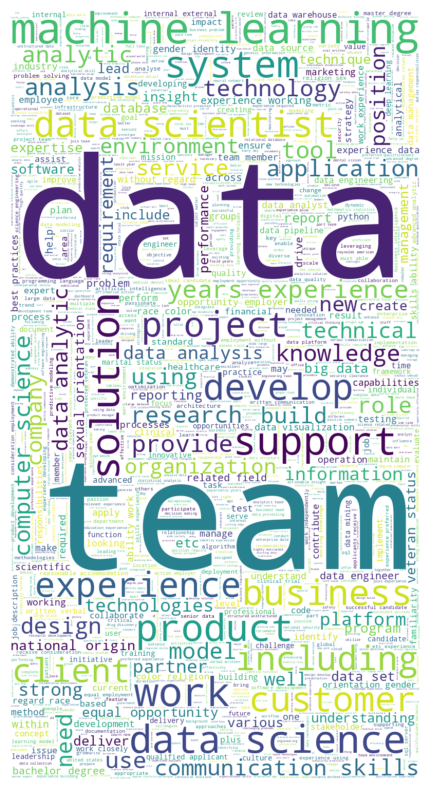

In [43]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('eda_data.csv')